In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticks
import datetime as dt
from matplotlib import dates as mdates
import os
import glob

In [2]:
# function to format y-axis units
def thousands(x, pos):
    """formats count in thousands"""
    new_x = x / 1000
    return f"{new_x:,.0f}K"

In [3]:
f = "Data/Chicago-Crime*.csv"
crime_data = sorted(glob.glob(f))
crime_data

['Data\\Chicago-Crime_2001.csv',
 'Data\\Chicago-Crime_2002.csv',
 'Data\\Chicago-Crime_2003.csv',
 'Data\\Chicago-Crime_2004.csv',
 'Data\\Chicago-Crime_2005.csv',
 'Data\\Chicago-Crime_2006.csv',
 'Data\\Chicago-Crime_2007.csv',
 'Data\\Chicago-Crime_2008.csv',
 'Data\\Chicago-Crime_2009.csv',
 'Data\\Chicago-Crime_2010.csv',
 'Data\\Chicago-Crime_2011.csv',
 'Data\\Chicago-Crime_2012.csv',
 'Data\\Chicago-Crime_2013.csv',
 'Data\\Chicago-Crime_2014.csv',
 'Data\\Chicago-Crime_2015.csv',
 'Data\\Chicago-Crime_2016.csv',
 'Data\\Chicago-Crime_2017.csv',
 'Data\\Chicago-Crime_2018.csv',
 'Data\\Chicago-Crime_2019.csv',
 'Data\\Chicago-Crime_2020.csv',
 'Data\\Chicago-Crime_2021.csv',
 'Data\\Chicago-Crime_2022.csv']

In [4]:
df = pd.concat([pd.read_csv(f, lineterminator='\n') for f in crime_data])
df

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
0,1326041,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,NaN,41.957850,-87.749185
1,1319931,01/01/2001 01:00:00 PM,BATTERY,SIMPLE,RESIDENCE,False,True,825,8.0,NaN,41.783892,-87.684841
2,1324743,01/01/2001 01:00:00 PM,GAMBLING,ILLEGAL ILL LOTTERY,STREET,True,False,313,3.0,NaN,41.780412,-87.611970
3,1310717,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2424,24.0,NaN,42.012391,-87.678032
4,1318099,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,True,214,2.0,NaN,41.819538,-87.620020
...,...,...,...,...,...,...,...,...,...,...,...,...
238853,12938029,12/31/2022 12:50:00 PM,ASSAULT,SIMPLE,APARTMENT,False,False,1014,10.0,24.0,41.855911,-87.719966
238854,12937822,12/31/2022 12:50:00 PM,ASSAULT,AGGRAVATED - HANDGUN,APARTMENT,False,True,733,7.0,6.0,41.766546,-87.645669
238855,12937583,12/31/2022 12:52:00 AM,BATTERY,SIMPLE,BARBERSHOP,False,False,1135,11.0,28.0,41.868829,-87.686098
238856,12938420,12/31/2022 12:52:00 PM,ASSAULT,SIMPLE,COMMERCIAL / BUSINESS OFFICE,False,False,1432,14.0,32.0,41.930693,-87.685657


In [5]:
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y %I:%M:%S %p')
df['Date']

0        2001-01-01 01:00:00
1        2001-01-01 13:00:00
2        2001-01-01 13:00:00
3        2001-01-01 01:00:00
4        2001-01-01 01:00:00
                 ...        
238853   2022-12-31 12:50:00
238854   2022-12-31 12:50:00
238855   2022-12-31 00:52:00
238856   2022-12-31 12:52:00
238857   2022-12-31 12:59:00
Name: Date, Length: 7713109, dtype: datetime64[ns]

In [6]:
df = df.set_index('Date')
df

,ID,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
Date,,,,,,,,,,,
2001-01-01 01:00:00,1326041,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,NaN,41.957850,-87.749185
2001-01-01 13:00:00,1319931,BATTERY,SIMPLE,RESIDENCE,False,True,825,8.0,NaN,41.783892,-87.684841
2001-01-01 13:00:00,1324743,GAMBLING,ILLEGAL ILL LOTTERY,STREET,True,False,313,3.0,NaN,41.780412,-87.611970
2001-01-01 01:00:00,1310717,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2424,24.0,NaN,42.012391,-87.678032
2001-01-01 01:00:00,1318099,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,True,214,2.0,NaN,41.819538,-87.620020
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 12:50:00,12938029,ASSAULT,SIMPLE,APARTMENT,False,False,1014,10.0,24.0,41.855911,-87.719966
2022-12-31 12:50:00,12937822,ASSAULT,AGGRAVATED - HANDGUN,APARTMENT,False,True,733,7.0,6.0,41.766546,-87.645669
2022-12-31 00:52:00,12937583,BATTERY,SIMPLE,BARBERSHOP,False,False,1135,11.0,28.0,41.868829,-87.686098


In [7]:
df_conv = df.copy()
df_conv

,ID,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
Date,,,,,,,,,,,
2001-01-01 01:00:00,1326041,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,NaN,41.957850,-87.749185
2001-01-01 13:00:00,1319931,BATTERY,SIMPLE,RESIDENCE,False,True,825,8.0,NaN,41.783892,-87.684841
2001-01-01 13:00:00,1324743,GAMBLING,ILLEGAL ILL LOTTERY,STREET,True,False,313,3.0,NaN,41.780412,-87.611970
2001-01-01 01:00:00,1310717,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2424,24.0,NaN,42.012391,-87.678032
2001-01-01 01:00:00,1318099,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,True,214,2.0,NaN,41.819538,-87.620020
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 12:50:00,12938029,ASSAULT,SIMPLE,APARTMENT,False,False,1014,10.0,24.0,41.855911,-87.719966
2022-12-31 12:50:00,12937822,ASSAULT,AGGRAVATED - HANDGUN,APARTMENT,False,True,733,7.0,6.0,41.766546,-87.645669
2022-12-31 00:52:00,12937583,BATTERY,SIMPLE,BARBERSHOP,False,False,1135,11.0,28.0,41.868829,-87.686098


In [8]:
df_conv = df_conv.resample("D").sum()
df_conv

C:\Users\romo_\AppData\Local\Temp\ipykernel_8720\2114885317.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_conv = df_conv.resample("D").sum()


,ID,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
Date,,,,,,,,
2001-01-01,4011740634,400,378,2267987,21147.0,8194.0,72641.077994,-152199.715024
2001-01-02,1545846568,383,187,1404493,12797.0,147.0,47664.670569,-99856.853277
2001-01-03,1542074517,343,197,1462886,13359.0,132.0,48045.805839,-100651.350927
2001-01-04,1555657957,377,179,1397040,12994.0,0.0,48785.523718,-102222.916683
2001-01-05,1701884634,415,200,1530155,14044.0,156.0,52769.463977,-110554.590960
...,...,...,...,...,...,...,...,...
2022-12-27,7543189950,70,96,694723,6812.0,14192.0,21427.078656,-44887.568351
2022-12-28,7983384637,63,112,697152,6830.0,14030.0,22592.581721,-47339.899182
2022-12-29,8358666625,66,107,718511,7037.0,14292.0,23639.979313,-49528.016672


## Stakeholder Questions to Answer

#### Topic 1) Comparing Police Districts 
 * 
Which district had the most crimes in 2022?
 * 
Which had the least?

In [9]:
df_district = df.loc['2022'].groupby("District").count()['Primary Type']

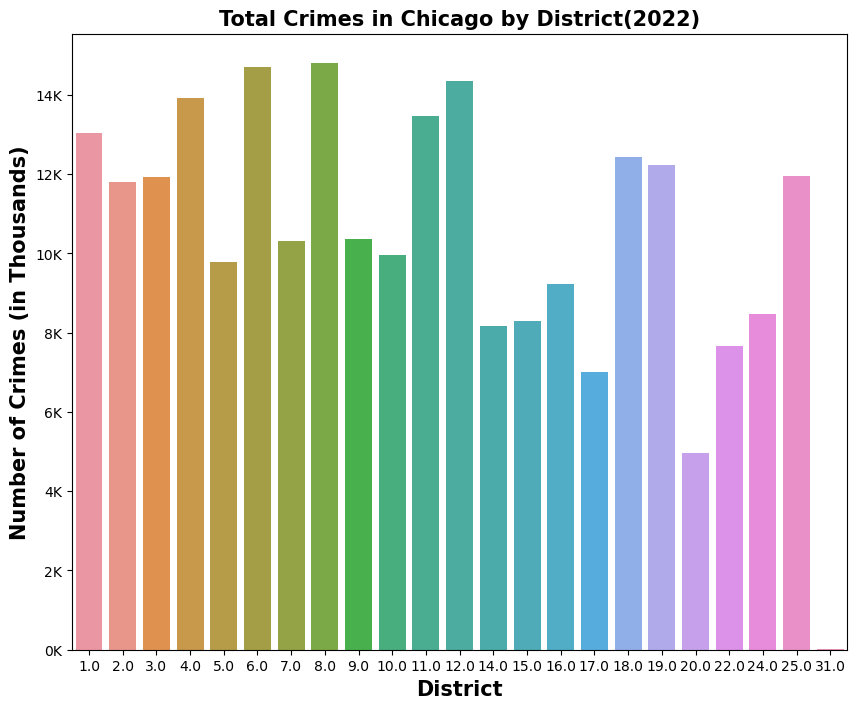

In [10]:
district_crimes = df_district.value_counts()

fig, ax = plt.subplots(figsize = (10, 8))
ax = sns.barplot(x = df_district.index, y = df_district.values)


fmt_thous = mticks.FuncFormatter(thousands)
ax.yaxis.set_major_formatter(fmt_thous)

ax.set_title('Total Crimes in Chicago by District(2022)', fontsize = 15, weight = 'bold')
ax.set_ylabel('Number of Crimes (in Thousands)', fontsize = 15, weight = 'bold')
ax.set_xlabel('District', fontsize = 15, weight = 'bold');


### District 8 has the most crimes and the district with the least is 31.

## Topic 2) Crimes Across the Years:

Is the total number of crimes increasing or decreasing across the years?

Are there any individual crimes that are doing the opposite (e.g., decreasing when overall crime is increasing or vice-versa)?

In [11]:
df_years = df.resample('Y').size()

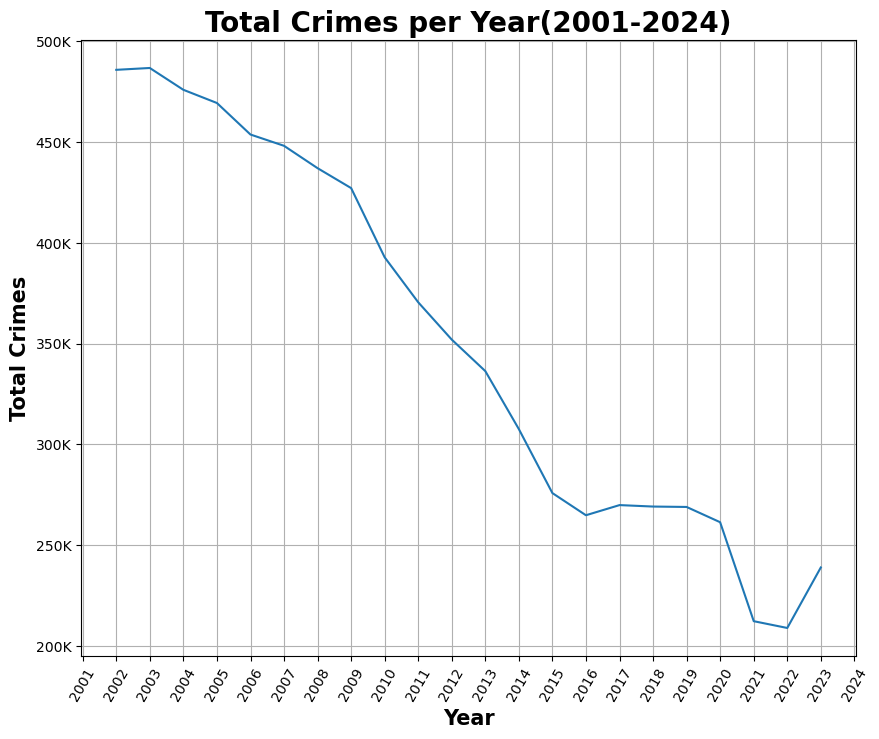

In [12]:
fig, ax = plt.subplots(figsize = (10, 8))
ax = sns.lineplot(x = df_years.index, y = df_years.values)

fmt_thous = mticks.FuncFormatter(thousands)
ax.yaxis.set_major_formatter(fmt_thous)

major_ticks_loc = mdates.YearLocator(1)
major_ticks_format = mdates.DateFormatter('%Y')
x_years = pd.date_range(start = '2001', end = '2024', freq = 'AS')
plt.xticks(x_years, [year.year for year in x_years])

plt.xticks(rotation = 60)
ax.grid()

ax.set_title('Total Crimes per Year(2001-2024)', fontsize = 20, weight = 'bold')
ax.set_ylabel('Total Crimes', fontsize = 15, weight = 'bold')
ax.set_xlabel('Year', fontsize = 15, weight = 'bold');

### The total number of crimes are decreasing per year

In [13]:
indiv_crimes = df.groupby('Primary Type').resample("Y").size()
indiv_crimes

Primary Type       Date      
ARSON              2001-12-31    1011
                   2002-12-31    1032
                   2003-12-31     955
                   2004-12-31     778
                   2005-12-31     691
                                 ... 
WEAPONS VIOLATION  2018-12-31    5456
                   2019-12-31    6339
                   2020-12-31    8432
                   2021-12-31    8980
                   2022-12-31    8766
Length: 723, dtype: int64

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

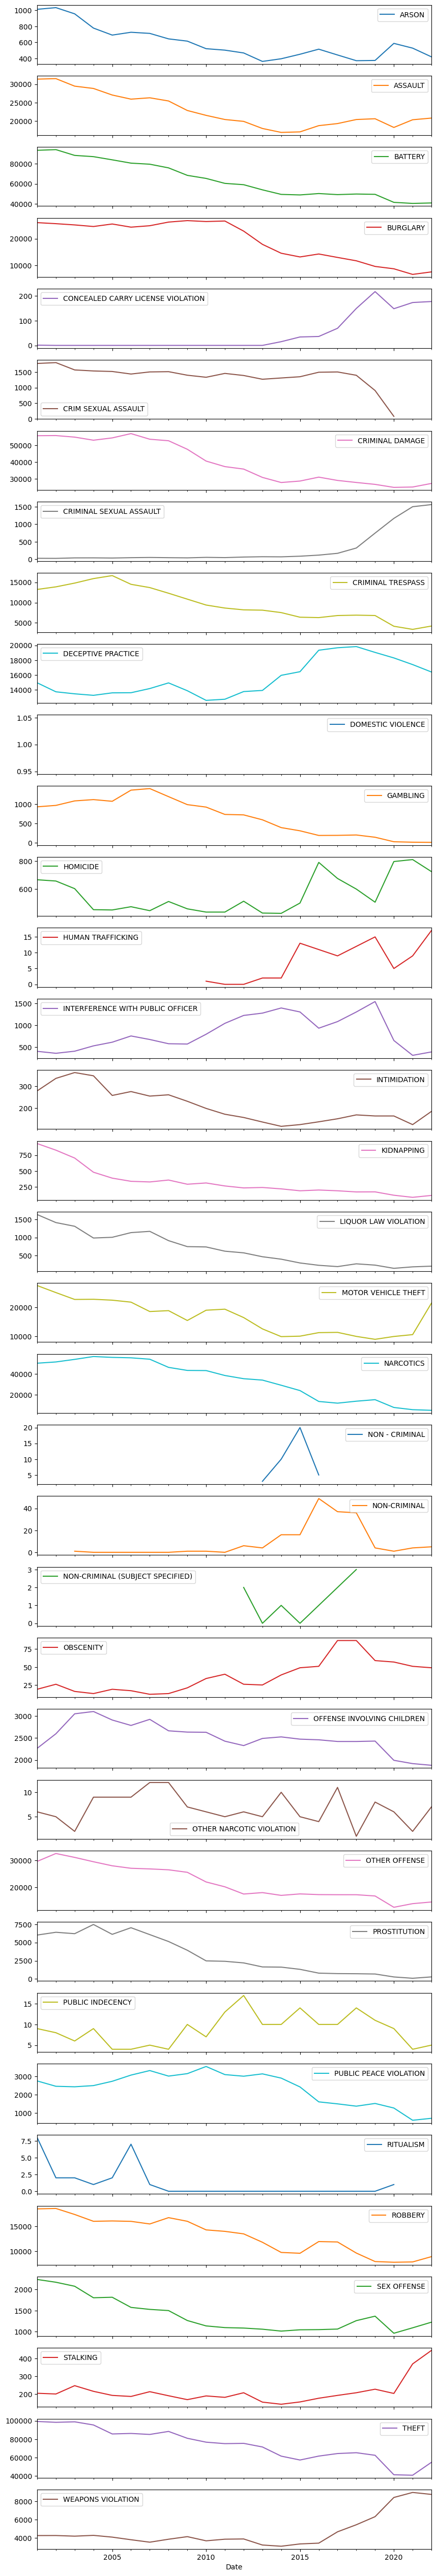

In [14]:
indiv_crimes.unstack().T.plot(subplots=True, figsize = (10,65))

### A few crimes are increasing and they are :
  - Concealed Carry License Violation
  - Criminal Sexual Assault
  - Deceptive Practice
  - Homicide
  - Human Trafficking
  - Obscenity
  - Stalking
  - Weapons Violation

## Topic 3) Comparing AM vs. PM Rush Hour:

##### Are crimes more common during AM rush hour or PM rush hour?

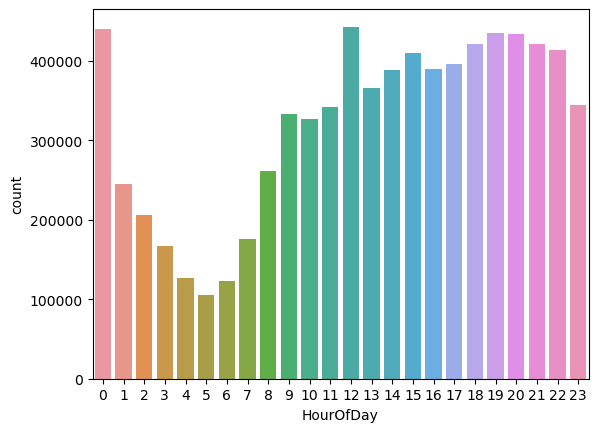

In [15]:
df['HourOfDay'] = df.index.hour
sns.countplot(data=df, x='HourOfDay');

### Crimes are more common in the PM Rush

##### What are the top 5 most common crimes during AM rush hour? What are the top 5 most common crimes during PM rush hour?

In [16]:
crimes_by_hour = df.groupby("HourOfDay")['Primary Type'].value_counts(normalize=False)
crimes_by_hour

HourOfDay  Primary Type                    
0          THEFT                               91882
           BATTERY                             71777
           CRIMINAL DAMAGE                     64386
           DECEPTIVE PRACTICE                  40410
           OTHER OFFENSE                       27799
                                               ...  
23         PUBLIC INDECENCY                        6
           NON-CRIMINAL                            4
           RITUALISM                               3
           HUMAN TRAFFICKING                       1
           NON-CRIMINAL (SUBJECT SPECIFIED)        1
Name: Primary Type, Length: 800, dtype: int64

In [17]:
am_rush = crimes_by_hour.loc[7]+crimes_by_hour.loc[8]+crimes_by_hour.loc[9]+crimes_by_hour.loc[10]
am_rush

Primary Type
ARSON                                  1139
ASSAULT                               73636
BATTERY                              158475
BURGLARY                              96219
CONCEALED CARRY LICENSE VIOLATION       157
CRIM SEXUAL ASSAULT                    2567
CRIMINAL DAMAGE                      109089
CRIMINAL SEXUAL ASSAULT                 544
CRIMINAL TRESPASS                     30493
DECEPTIVE PRACTICE                    80006
GAMBLING                                652
HOMICIDE                               1133
HUMAN TRAFFICKING                        19
INTERFERENCE WITH PUBLIC OFFICER       1380
INTIMIDATION                            907
KIDNAPPING                             1649
LIQUOR LAW VIOLATION                    409
MOTOR VEHICLE THEFT                   54035
NARCOTICS                             67032
NON - CRIMINAL                           19
NON-CRIMINAL                             40
OBSCENITY                               145
OFFENSE INVOLVING C

In [18]:
pm_rush = crimes_by_hour.loc[16]+crimes_by_hour.loc[17]+crimes_by_hour.loc[18]+crimes_by_hour.loc[19]
pm_rush

Primary Type
ARSON                                  1523.0
ASSAULT                              118179.0
BATTERY                              288003.0
BURGLARY                              78604.0
CONCEALED CARRY LICENSE VIOLATION       187.0
CRIM SEXUAL ASSAULT                    3874.0
CRIMINAL DAMAGE                      183423.0
CRIMINAL SEXUAL ASSAULT                 824.0
CRIMINAL TRESPASS                     48564.0
DECEPTIVE PRACTICE                    58973.0
GAMBLING                               4905.0
HOMICIDE                               2227.0
HUMAN TRAFFICKING                        12.0
INTERFERENCE WITH PUBLIC OFFICER       4403.0
INTIMIDATION                           1008.0
KIDNAPPING                             2092.0
LIQUOR LAW VIOLATION                   4168.0
MOTOR VEHICLE THEFT                   74678.0
NARCOTICS                            164754.0
NON - CRIMINAL                            5.0
NON-CRIMINAL                             40.0
NON-CRIMINAL (SUBJECT

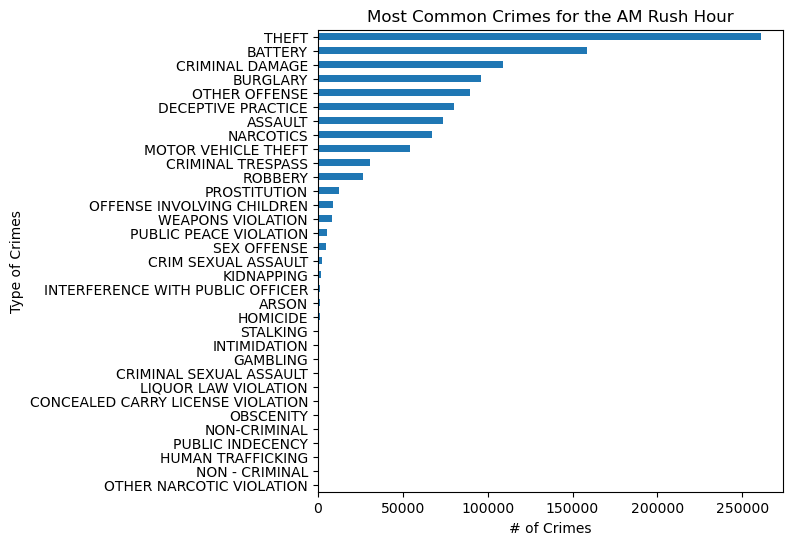

In [19]:
ax = am_rush.sort_values().plot(kind='barh',figsize=(6,6))
ax.set(title='Most Common Crimes for the AM Rush Hour',xlabel='# of Crimes',ylabel='Type of Crimes');

### The Top 5 most common crimes in the AM Rush are:
  - Theft
  - Battery
  - Criminal Damage
  - Burglary
  - Criminal Damage

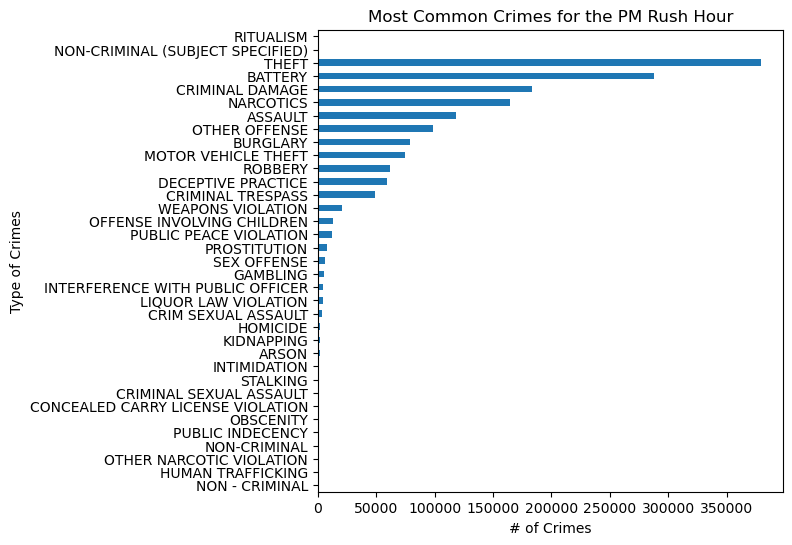

In [20]:
ax = pm_rush.sort_values().plot(kind='barh',figsize=(6,6))
ax.set(title='Most Common Crimes for the PM Rush Hour',xlabel='# of Crimes',ylabel='Type of Crimes');

### The Top 5 most common crimes in the PM Rush are:
  - Theft
  - Battery
  - Criminal Damage
  - Narcotics
  - Assault

##### Are Motor Vehicle Thefts more common during AM rush hour or PM Rush Hour?

In [21]:
am_rush.loc['MOTOR VEHICLE THEFT']

54035

In [22]:
pm_rush.loc['MOTOR VEHICLE THEFT']

74678.0

### Motor Vehicle Theft is more common in the PM than the AM.